In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


In [2]:
# Load dataset
wine = pd.read_csv('/content/WineQuality.csv')

wine_ml = pd.get_dummies(wine, columns=['Type'], drop_first=True)
wine_ml['Type_white'] = (wine['Type'] == 'white').astype(int)
wine_ml['Type_red'] = (wine['Type'] == 'red').astype(int)

wine_ml = wine_ml.drop('total sulfur dioxide', axis=1)

# Drop rows with missing values
wine_ml.dropna(inplace=True)

X = wine_ml.drop('quality', axis=1)
Y = wine_ml['quality'].apply(lambda y: 1 if y > 7 else 0)

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_standardized, Y, test_size=0.2, random_state=123)

In [3]:
def plot_confusion_matrix_heatmap(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()

def plot_roc_curve(y_true, y_prob, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

Decision Tree Accuracy: 0.9934823091247672
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3147
           1       0.85      0.88      0.86        75

    accuracy                           0.99      3222
   macro avg       0.92      0.94      0.93      3222
weighted avg       0.99      0.99      0.99      3222



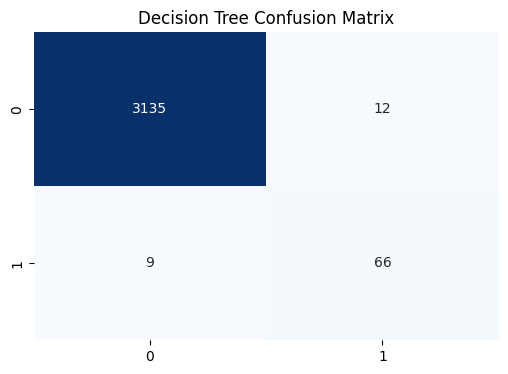

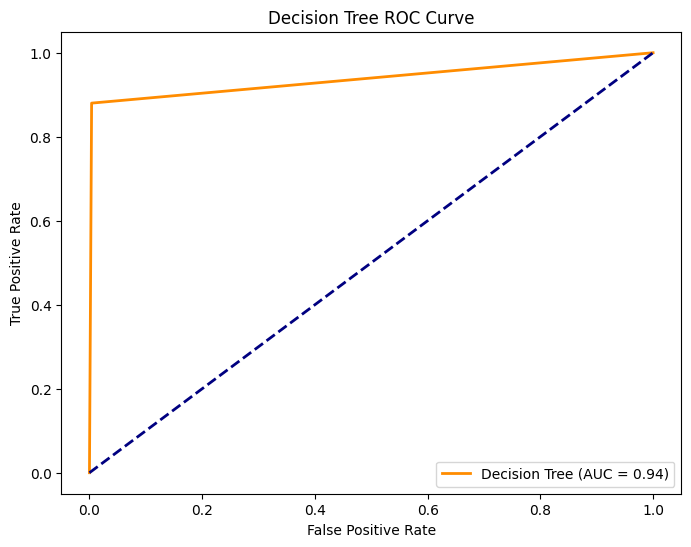

In [4]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
y_pred_dt = decision_tree.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(Y_test, y_pred_dt))
print("Decision Tree Classification Report:\n", classification_report(Y_test, y_pred_dt))

plot_confusion_matrix_heatmap(Y_test, y_pred_dt, 'Decision Tree')
plot_roc_curve(Y_test, decision_tree.predict_proba(X_test)[:, 1], 'Decision Tree')

K Nearest Neighbors Accuracy: 0.9810676598386096
K Nearest Neighbors Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3147
           1       0.58      0.65      0.62        75

    accuracy                           0.98      3222
   macro avg       0.79      0.82      0.80      3222
weighted avg       0.98      0.98      0.98      3222



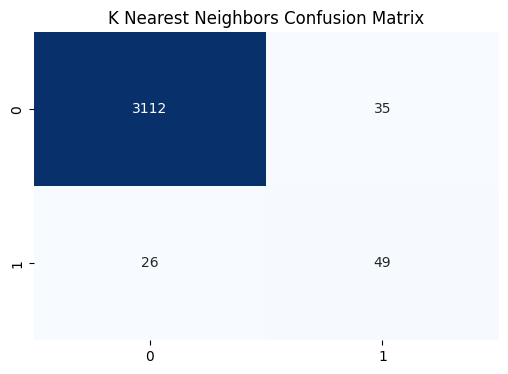

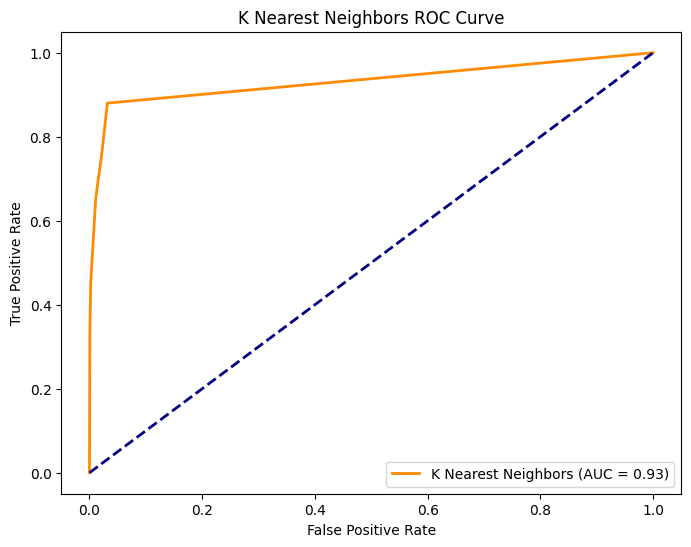

In [ ]:
# K Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
y_pred_knn = knn.predict(X_test)

print("K Nearest Neighbors Accuracy:", accuracy_score(Y_test, y_pred_knn))
print("K Nearest Neighbors Classification Report:\n", classification_report(Y_test, y_pred_knn))

plot_confusion_matrix_heatmap(Y_test, y_pred_knn, 'K Nearest Neighbors')
plot_roc_curve(Y_test, knn.predict_proba(X_test)[:, 1], 'K Nearest Neighbors')

Random Forest Accuracy: 0.9968963376784605
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3147
           1       1.00      0.87      0.93        75

    accuracy                           1.00      3222
   macro avg       1.00      0.93      0.96      3222
weighted avg       1.00      1.00      1.00      3222



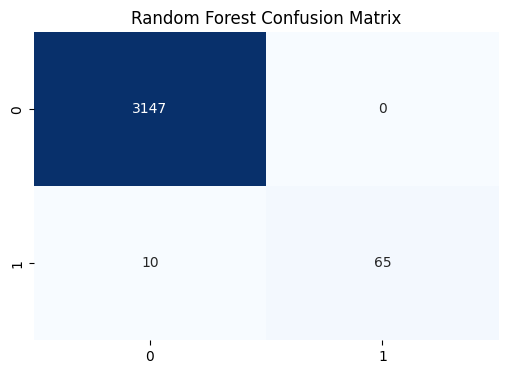

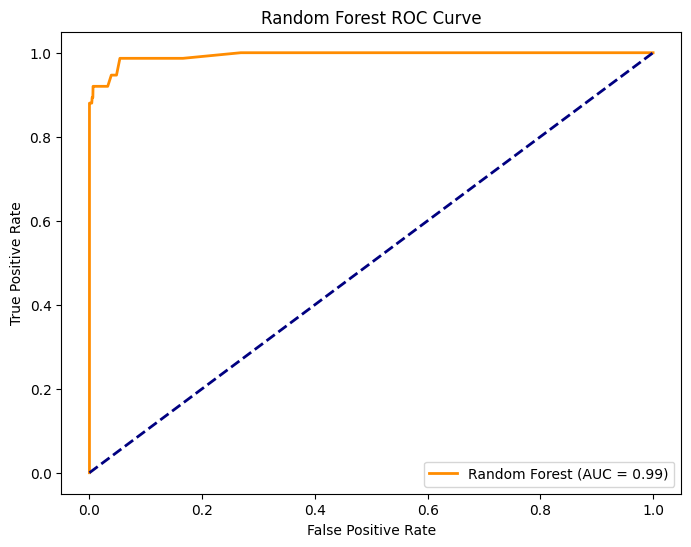

In [ ]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=200)
random_forest.fit(X_train, Y_train)
y_pred_rf = random_forest.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(Y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(Y_test, y_pred_rf))

plot_confusion_matrix_heatmap(Y_test, y_pred_rf, 'Random Forest')
plot_roc_curve(Y_test, random_forest.predict_proba(X_test)[:, 1], 'Random Forest')